In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Primeiras 5 linhas do dataset:       
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...       
 
Distribuiçao das classes ham e spam:

label
ham     4825
spam     747
Name: count, dtype: int64


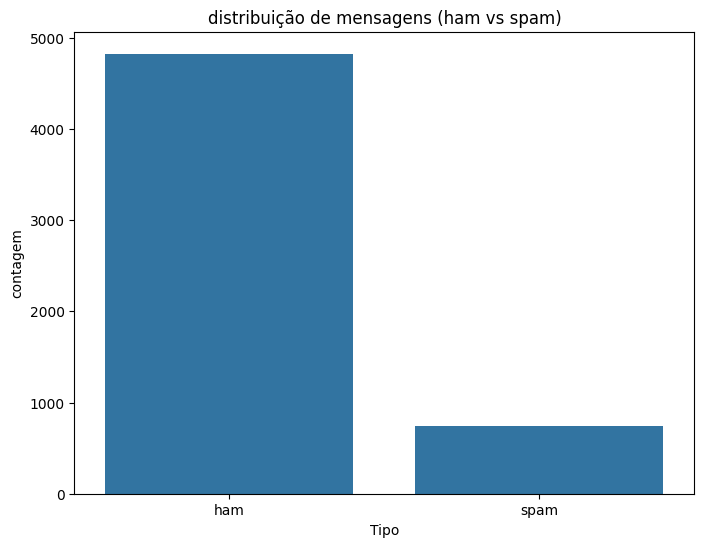



exemplo de ham:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


exemplo de spam:
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [18]:
# 1. carregando os dados a partir do arquivo SMSSpamCollection

data = r'data'

df = pd.read_csv(data, sep='\t', header=None, names=['label', 'message'])

print(f'Primeiras 5 linhas do dataset: \
      \n{df.head()} \
      \n' + '=' *40 +'\n ')


# 2. analisar a distribuicao das classes 

print(f'Distribuiçao das classes ham e spam:\n')
print(df['label'].value_counts())

# graficos para visualizar melhor

plt.figure(figsize=(8,6))
sns.countplot(x='label', data=df)
plt.title('distribuição de mensagens (ham vs spam)')
plt.xlabel('Tipo')
plt.ylabel('contagem')
plt.show()



# 3. verifica exemplos de cada classe (total 22)

print('\n\nexemplo de ham:')
print(df[df['label'] == 'ham']['message'].iloc[0])

print('\n\nexemplo de spam:')
print(df[df['label'] == 'spam']['message'].iloc[0])

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize

#nltk.download('punkt_tab')

def preprocessar_texto(texto):
    #limpa e prepara o texto das mensagens

    # regex p remover caracter especial e nums 
    texto = re.sub(r'[^a-zA-Z\s]', '', texto, flags=re.I|re.A)

    texto = texto.lower()

    #tokenizar o texto para o ml
    tokens = word_tokenize(texto)

    return " ".join(tokens)


# usando a def criada acima
df['clean_message'] = df['message'].apply(preprocessar_texto)

print ('msg original vs msg tratada')
print (f'original: {df['message'].iloc[5]}')
print (f'tratada: {df['clean_message'].iloc[5]}')



msg original vs msg tratada
original: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
tratada: freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer


# usando o vetorizador p classificar a importancia d cada palavra
vectorizer = TfidfVectorizer()

# aplicando o vetorizador nas msg tratadas p criação da matriz
x = vectorizer.fit_transform(df['clean_message'])

# a variavel y será nosso alvo
y = df['label']

print('formato de matriz feature (x)')
print(f'a matriz tem {x.shape[0]} linhas (mensagens) e {x.shape[1]} colunas (palavras unicas).')


formato de matriz feature (x)
a matriz tem 5572 linhas (mensagens) e 8599 colunas (palavras unicas).


In [ ]:
from sklearn.model_selection import train_test_split

# dividir os dados p treino e teste
# random_state garante q a divisao será sempre igual

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print('tamanho dos conjuntos de treino e teste:')
print(f'treino:{x_train.shape[0]} \
      teste: {x_test.shape[0]}')



tamanho dos conjuntos de treino e teste:
treino:3900       teste: 1672


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


### treinando o modelo naive bayes multinomial
print('treinando o modelo naive bayes')
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)



print('treinando o modelo svm linear')
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)




treinando o modelo naive bayes
treinando o modelo svm linear


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


avaliação do modelo: Naive Bayes Multinomial
acurácia:0.9545

relatorio de classificação
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1448
        spam       1.00      0.66      0.80       224

    accuracy                           0.95      1672
   macro avg       0.98      0.83      0.89      1672
weighted avg       0.96      0.95      0.95      1672



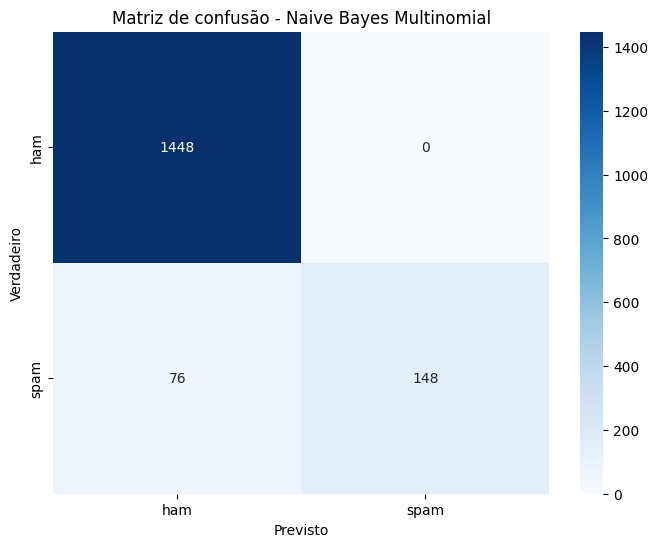

avaliação do modelo: SVM Linear
acurácia:0.9856

relatorio de classificação
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1448
        spam       0.99      0.91      0.94       224

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



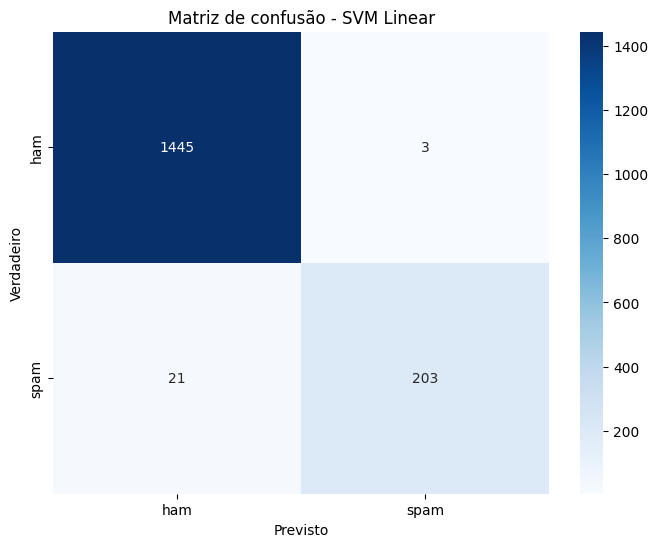

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# função para avaliar e imprimir os resultados

def evaluate_model(model, model_name):
    print(f'avaliação do modelo: {model_name}')
    y_pred = model.predict(x_test)

    # acurácia
    acc = accuracy_score(y_test, y_pred)
    print(f'acurácia:{acc:.4f}\n')

    # relatório de classificação (precisao, recall, f1-score)
    print('relatorio de classificação')
    print(classification_report(y_test, y_pred))

    # matriz de confusão 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap (cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.title (f'Matriz de confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()


# avaliar os dois modelos usando a def criada acima

evaluate_model(nb_model, "Naive Bayes Multinomial")
evaluate_model(svm_model, "SVM Linear")



iniciando otimizacao com gridSearchCV
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..............................................C=0.1; total time=   0.6s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.4s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ..............................................C=0.1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.6s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ................................................C=1; total time=   0.5s
[CV] END ...............................................C=10; total time=   0.5s
[CV] END ..

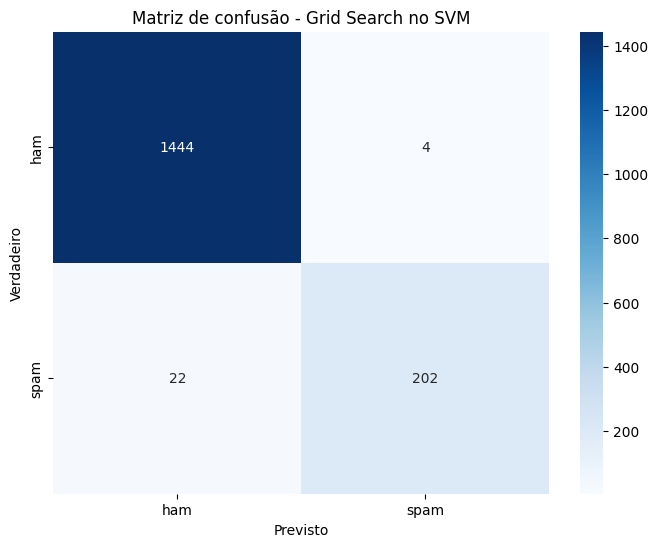

In [50]:
# otimizacao

from sklearn.model_selection import GridSearchCV

#definir os parametros que testaremos para o SVM, C é o parametro p regularização
#melhorando o desempenho do modelo

param_grid = {'C': [0.1, 1, 10, 100]}

#criar o obj GridSearchCV, e cv=5 p validação cruzada de 5 folds
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, verbose=2)
'\n'
print('iniciando otimizacao com gridSearchCV')
grid_search.fit(x_train, y_train)

#avaliando o modelo otimizado e comparando com o anterior
best_svm_model = grid_search.best_estimator_
evaluate_model(best_svm_model, 'Grid Search no SVM')
